# Here I demonstrate two methods to obtain PCA component
1. First case, all the columns have same PCA component, using PCA component times its variance ratio

2. Second case all the columns have different created PCA using inverse function, this idea is based on what bianco saif that we should be able to recreate the columns using PCA

In [0]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [0]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


(150, 5)


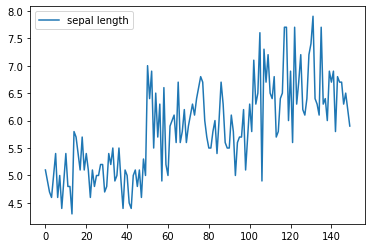

In [20]:
print(df.shape)
df.plot(y = 'sepal length')

In [0]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

Rescaling the features and assigning the target to differnt variable

In [0]:
x = df.loc[:, features].values# Separating out the target
y = df.loc[:,['target']].values# Standardizing the features
x = StandardScaler().fit_transform(x)

In [15]:
x_std= pd.DataFrame(data = x
             , columns = features)

print(x_std['sepal length'].mean())
print(x_std['sepal length'].std())
x_std.head()

-2.7755575615628914e-16
1.0033500931359767


,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


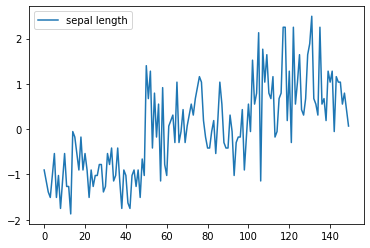

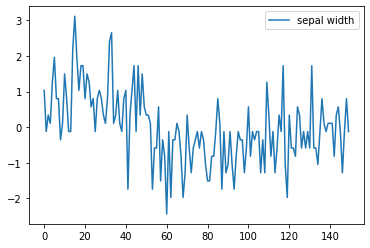

In [43]:
x_std.plot(y = 'sepal length')
x_std.plot(y = 'sepal width')

PCA to two components, we can do upto four since we have 4 features in total

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

Creating a new data frame with n= 1 and n=2 pricipal components

In [0]:
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1','principal component 2' ])

In [47]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
print(finalDf['principal component 1'].mean())
print(finalDf['principal component 1'].std())
finalDf.head()

3.049412574303763e-16
1.7118276126962415


,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


In [32]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

If I am plotting the principal component

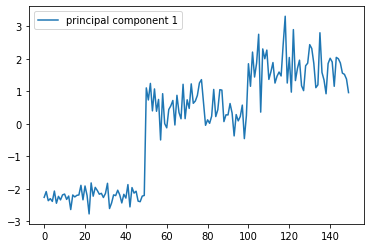

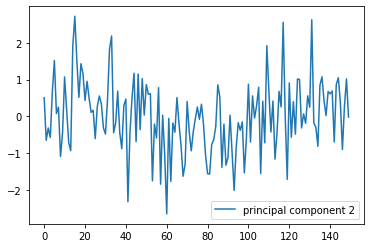

In [48]:
finalDf.plot(y = 'principal component 1')
finalDf.plot(y = 'principal component 2')

First method of recreating the PCA

In [41]:
#recerating the principal component by adding
recreate = finalDf.iloc[:,0]*pca.explained_variance_ratio_[0] +\
           finalDf.iloc[:,1]*pca.explained_variance_ratio_[1] 

finalDf['recreate'] = pd.DataFrame(data = recreate, columns = ['recreate'])
finalDf.head()

,principal component 1,principal component 2,target,recreate
0,-2.264542,0.505704,Iris-setosa,-1.531451
1,-2.086426,-0.655405,Iris-setosa,-1.669244
2,-2.367950,-0.318477,Iris-setosa,-1.796515
3,-2.304197,-0.575368,Iris-setosa,-1.809285
4,-2.388777,0.674767,Iris-setosa,-1.582922


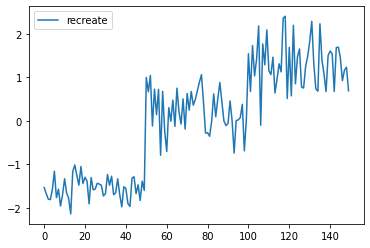

In [42]:
finalDf.plot(y = 'recreate')

Second method of creating the PCA. In this case all columns have its own PCA using two PCA components

In [0]:
fd = pca.inverse_transform(principalComponents)
fdd = pd.DataFrame(data = fd, columns = features)


In [0]:
fddd = pd.concat([fdd, df[['target']]], axis = 1)

In [52]:
print(fddd['sepal length'].mean())
print(fddd['sepal length'].std())

fddd.head()

-2.9494925020874993e-16
0.9634154871959546


,sepal length,sepal width,petal length,petal width,target
0,-0.994649,1.064436,-1.305606,-1.247769,Iris-setosa
1,-1.333909,-0.057144,-1.226569,-1.222979,Iris-setosa
2,-1.355525,0.328843,-1.383099,-1.360172,Iris-setosa
3,-1.417867,0.074286,-1.351461,-1.340917,Iris-setosa
4,-0.996601,1.253632,-1.374252,-1.306979,Iris-setosa


In [55]:
x_std.head()   # to comapre with previos table

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


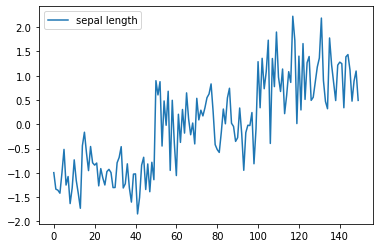

In [54]:
fddd.plot(y = 'sepal length')

In [0]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
fdd.head()

,sepal length,sepal width,petal length,petal width
0,-0.994649,1.064436,-1.305606,-1.247769
1,-1.333909,-0.057144,-1.226569,-1.222979
2,-1.355525,0.328843,-1.383099,-1.360172
3,-1.417867,0.074286,-1.351461,-1.340917
4,-0.996601,1.253632,-1.374252,-1.306979


In [0]:
bb = df[features] - fdd
bb.head()

,sepal length,sepal width,petal length,petal width
0,6.094649,2.435564,2.705606,1.447769
1,6.233909,3.057144,2.626569,1.422979
2,6.055525,2.871157,2.683099,1.560172
3,6.017867,3.025714,2.851461,1.540917
4,5.996601,2.346368,2.774252,1.506979
